My attempt to implment logictic regression from scracth. data is from master machine learnng algorithms. 

In [79]:
data =[
[2.7810836, 2.550537003, 0],
[1.465489372, 2.362125076, 0],
[3.396561688, 4.400293529, 0],
[1.38807019, 1.850220317,0],
[3.06407232, 3.005305973, 0],
[7.627531214, 2.759262235, 1],
[5.332441248, 2.088626775, 1],
[6.922596716, 1.77106367, 1],
[8.675418651, -0.242068655, 1],
[7.673756466, 3.508563011, 1]]

In [80]:
from gradient_descent_ols import Vector, add, plot_loss
from Multivariate_linear_regression import chunks, vector_mean, scalar_multiply, predict_point,add_intercept_vectors
import math
import random
from typing import List

In [81]:
def logit(z: float) -> float:
    return 1 / (1 + math.exp(-z))

assert 0 < logit(-5.4) < 0.01

In [82]:
def predict_point_logit(x: Vector, theta: Vector) -> float:
    return logit(predict_point(x, theta))

def error_point(x: Vector, y: float, theta: Vector) -> float:
    """ Calculates the prediction error at point x"""
    return predict_point_logit(x, theta) - y
    
def gradient(x: List[Vector], y: float, theta: Vector) -> List:
    """Calculates the gradient update for 1 point for theta """
    return scalar_multiply(error_point(x, y, theta), x)

def evaluate_gradient(data: List[List[Vector]], theta: Vector) -> float:
    """evaluates gradient for provided data structure 
    [[x_0, x_1,.., x_i],[x_0, x_1,.., x_i]] -> [y_1,y_2]"""
    return vector_mean([gradient(x, y, theta) for x, y in data]) 
    
def gradient_step(gradient: Vector, alpha: float) -> Vector:
    """ takes one gradient step"""
    return scalar_multiply(alpha, gradient)

def theta_update(theta: Vector, gradient: Vector , alpha: float) -> Vector:
    return add(theta, gradient_step(gradient, -alpha))

In [83]:
def _point_loss_function_logistic(y_hat:float, y: float) -> float:
    """for one point calculate the loss"""
    return y * math.log(y_hat) + (1 - y) * (math.log(1 - y_hat))

def loss_function_logistic(y_hats: Vector, ys: Vector) -> float:
    """for a pair of y_hat and y vectors calculate  the loss value"""
    assert len(y_hats) == len(ys)
    m = len(y_hats)
    return (-1/ m ) * sum( _point_loss_function_logistic(y_hat, y)
                         for y_hat, y in zip(y_hats, ys))

In [84]:
xs = [vector[:-1] for vector in data]
ys = [vector[-1] for vector in data]

In [85]:
data_copy = [[x, y] for x, y in zip(add_intercept_vectors(xs), ys)]
data_copy
chunk = list(chunks(data_copy, 2))[-1]
chunk

[[[1, 3.06407232, 3.005305973], 0], [[1, 5.332441248, 2.088626775], 1]]

In [86]:
grad = evaluate_gradient(chunk, [0.4, 0.1, 1])
grad

[0.46484984569463583, 1.3716534649614682, 1.4183047654517755]

In [87]:
def negative_log_fit(xs: List[float] , ys: List[float], 
                       alpha: float,  epochs: int = 1000, 
                       batch_size: int = 10) -> Vector:
    """
    Find the theta that minimizes the loss function
    """      
    n = len(xs[0])                              # number of features
    theta = [random.random() for _ in range(n)] # initial random guess for theta
                                                # number trainning examples
    loss = []                                   # to plot the avg. loss per epoch
    
    data = [[x, y] for x, y in zip(xs, ys)]     # zip data structure 
    for epoch in range(epochs):
        chunks_loss = []                                # for avg. loss
        for chunk in chunks(data, batch_size):
            grad = evaluate_gradient(chunk, theta)               # evaluate the gradient    
            theta = theta_update(theta, grad, alpha)             # update theta 
            y_hats = [predict_point_logit(x, theta) for x in xs]
            loss_per_chunk = loss_function_logistic(y_hats, ys)  # loss per chunk iter
            chunks_loss.append(loss_per_chunk)                          
        average_epoch_loss = sum(chunks_loss) / len(chunks_loss)       
        loss.append((epoch, average_epoch_loss))                # plot the avg per epoch
    plot_loss(loss)
    return theta

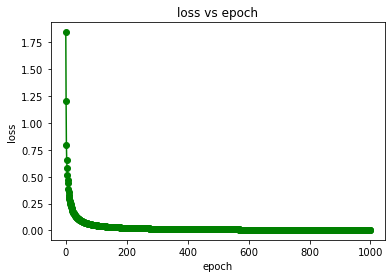

In [88]:
theta  = negative_log_fit(add_intercept_vectors(xs), ys, 0.1, 1000, 5)

In [89]:
y_hats = [predict_point_logit(x, theta) for x in add_intercept_vectors(xs)]
[(yhat, y) for yhat, y in zip(y_hats, ys)]

[(0.019137096796483254, 0),
 (0.001354332652129273, 0),
 (6.183395459300739e-05, 0),
 (0.008413369426560362, 0),
 (0.006628752675126651, 0),
 (0.9995963049991338, 1),
 (0.9892507136388534, 1),
 (0.999950433036449, 1),
 (0.9999999998245226, 1),
 (0.9930104691952216, 1)]

In [90]:
from log_regression_data import rescaled_xs, ys

In [91]:
rescaled_xs[:2]

[[1.0, -1.5094614661118109, -1.2035820048365877],
 [1.0, -1.0880203866948324, -1.2035820048365877]]

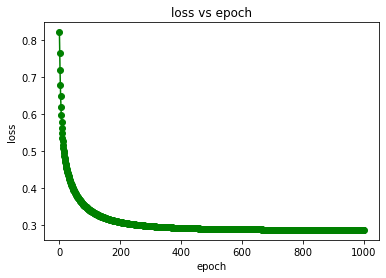

In [92]:
theta  = negative_log_fit(rescaled_xs, ys, 0.01, 1000, 5)

In [93]:
theta

[-2.0316163480738965, 4.306518671661927, -4.184318748168664]

In [94]:
y_hats = [predict_point_logit(x, theta) for x in rescaled_xs]
[(yhat, y) for yhat, y in zip(y_hats, ys)]

[(0.02942712596154923, 1),
 (0.156959695644949, 0),
 (0.01789246565382585, 1),
 (0.09603374119986174, 0),
 (0.04649686211359515, 0),
 (0.4062876189399303, 0),
 (0.32036867496911237, 0),
 (0.044092416752292446, 0),
 (0.3052689144016113, 1),
 (0.758387163992181, 1),
 (0.11939681901137641, 0),
 (0.006280294172631896, 0),
 (0.9021295267904771, 1),
 (0.05368140823395663, 0),
 (0.048527496453833384, 0),
 (0.0665349611272837, 0),
 (0.04504790965675245, 0),
 (0.08742229742431153, 0),
 (0.0055040865225074054, 0),
 (0.3550458269783451, 0),
 (0.015583620634376873, 0),
 (0.7474965303864026, 1),
 (0.012943278302229116, 0),
 (0.09477047417981038, 0),
 (0.14184407337973345, 1),
 (0.7924867228505579, 1),
 (0.004800059219764594, 0),
 (0.07305492503722992, 0),
 (0.963353150568117, 1),
 (0.0033502687756335574, 0),
 (0.003603757849029665, 0),
 (0.002147514917443449, 0),
 (0.04275443502813533, 1),
 (0.03406835033246139, 0),
 (0.22393316006711636, 1),
 (0.055238461411756506, 0),
 (0.7406194712101033, 1),
 (